<a id='Q0'></a>
<center><a target="_blank" href="https://sit.academy/"><img src="https://drive.google.com/uc?id=1z0U84GYqhbWWpCenFajh8_8XFRGyOc3U" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Notebook #: Bayes Analysis of IBM Attrition Data Set </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>SIT Academy, 2022</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Short description of the aim of the notebook</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#I'>Introduction </a> </li>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Part 1</a></li>
            <li> <a style="color:#303030" href='#P2'>Part 2</a></li>
            <li> <a style="color:#303030" href='#P3'>Part 3</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Keywords:</strong> data cleaning, NLP, ... list of keywords.
    </div>
</div>
</nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

Here you could write an introduction to the topics. Everything that is written here will appear in the live coding template notebook

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

In [1]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# draw matplotlib plots in line
%matplotlib inline
# enforce PEP 8 code on jupyter lab ...

# ... or jupyter notebook
# %load_ext nb_black

### Packages

In [2]:
# General
import pandas as pd
import numpy as np

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


### Custom classes and functions

In [3]:
import sys
SCRIPT_DIR = "../src"
sys.path.append(SCRIPT_DIR)

In [4]:
from template_module import my_function_name

### Global Parameters Setting

In [5]:
plt.style.use("seaborn")

### User-Dependent Variables

In [9]:
url_features = "../data/WA_Fn-UseC_-HR-Employee-Attrition.csv"  # path to data file

<a id='P1'></a>
## [Part one](#P0)

Exploratory data analysis.

Assumptions Made by Naïve Bayes
 
The fundamental Naïve Bayes assumption is that each feature makes an:

-independent

-equal --> to research bayes with weights

contribution to the outcome.

We assume that no pair of features are dependent.--> to do correlation pairplot



In [45]:
df_raw=pd.read_csv(url_features)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [46]:
df_raw

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [30]:
df_raw.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
##columns to drop based on histogram plots: these column provide no additional informations: 'DailyRate','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours'
##columns to drop after reviewing correlation numbers: MonthlyIncome, PercentSalaryHike, TotalWorkingYears

In [54]:
df=df_raw.drop(columns=['DailyRate','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours','MonthlyIncome','TotalWorkingYears','PercentSalaryHike'])

In [55]:
def encodeTravel(row):
    if row['BusinessTravel'] =='Non-Travel':
        return 1
    if row['BusinessTravel']=='Travel_Rarely':
        return 2
    if row['BusinessTravel'] =='Travel_Frequently':
        return 3
def encodeGender(row):
    if row['Gender'] =='Female':
        return 1
    if row['Gender']=='Male':
        return 2
def encodeStatus(row):
    if row['MaritalStatus'] =='Single':
        return 1
    if row['MaritalStatus']=='Married':
        return 2  
    if row['MaritalStatus']=='Divorced':
        return 3 
df['TravelCode']=df.apply(lambda row: encodeTravel(row), axis=1)
df['GenderCode']=df.apply(lambda row: encodeGender(row), axis=1)
df['MaritalStatusCode']=df.apply(lambda row: encodeStatus(row), axis=1)

In [58]:
df=df_raw.drop(columns=['BusinessTravel','Gender','MaritalStatus'])

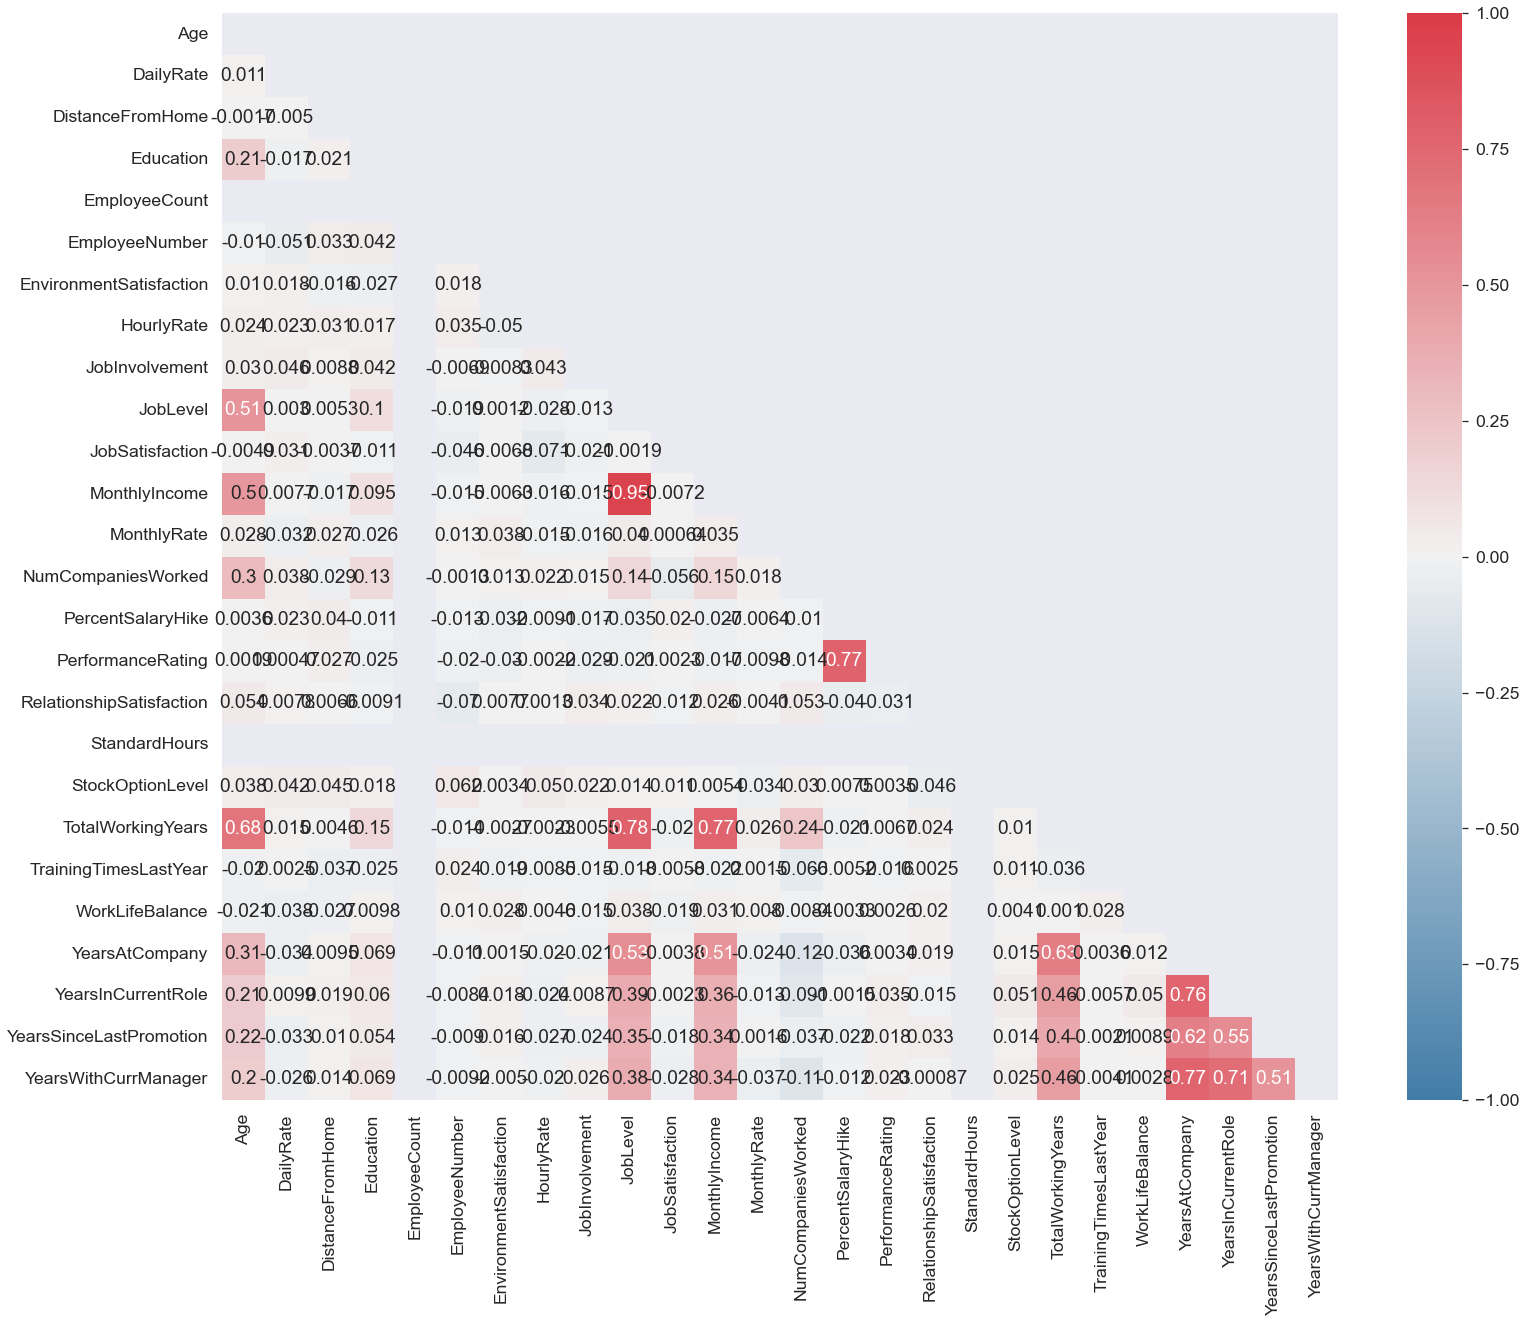

In [60]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.set(font_scale=1.6)
fig,ax=plt.subplots(figsize=(25,20))

fig=sns.heatmap(
    corr,
    mask = mask,
    vmin = -1,
    vmax = 1,
    cmap = cmap,
    annot = True
);


In [61]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [62]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [65]:
resigned=df[df['Attrition']=='Yes']['EmployeeCount'].sum()
survived=df[df['Attrition']=='No']['EmployeeCount'].sum()
total=df['EmployeeCount'].sum()
resigned, survived, total

(237, 1233, 1470)

In [67]:
p_resigned=resigned/total
p_survived=survived/total
p_resigned, p_survived

(0.16122448979591836, 0.8387755102040816)

In [68]:
df['DistanceFromHome'].mean()

9.19251700680272

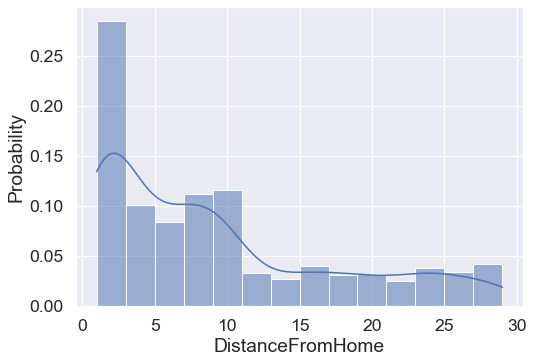

In [69]:
sns.histplot(x='DistanceFromHome', data=df, kde=True, cumulative=False, stat='probability');

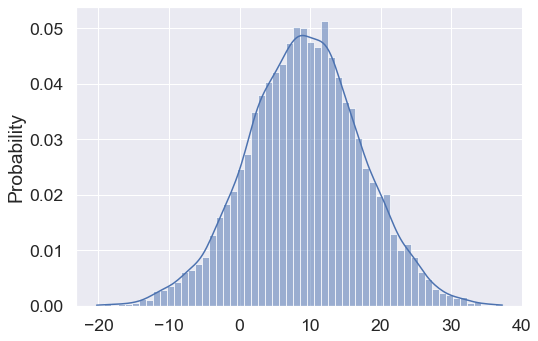

In [85]:
from scipy.stats import norm


distr = np.random.normal(loc=df['DistanceFromHome'].mean(), scale=np.std(df['DistanceFromHome'],ddof=1), size=10000)

sns.histplot(distr, stat='probability',kde=True);

### Subsection 1

This is a subsection. It can either be tagged as a hint, a solution or not tagged.

<div style="background:#EEEDF5;color:#303030"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    This Markdown cell is a template to write extended comments. e.g. explain the approach taken, or concepts behind algorithm chosen. Aim at having 2 lines at least. Anything smaller can be directly integrated in the code, or gathered together with other comments to form a bigger paragraph. Since this block is within a div element, you need to use html formatting syntax, not markdown
</div>

<div style="background:#EEEDF5;border:0.1cm solid #FDB100;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#FDB100">Title:</b> 
        This is a an example yellow box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        This is an example Blue Box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #EF475B;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        This is an example red box
    </div>
</div>

<a id='P2' name="P2"></a>
## [Part 2 title here](#P0)

<a id='P3' name="P3"></a>
## [Part 3 title here](#P0)

<a id='CL'></a>
## [Conclusion](#P0)

This is a pre-written conclusion in which we have nice figures.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>